## Handwritten Digit Classifier Project
In this project a handwritten digit classifier will be constructed by using a neural network. The `load_digits` dataset from `sklearn.datasets` will be used to train and test the . 

Image recognition is a difficult task:

* each pixel is a feature (large amount of data)
* no clear linear or non-linear correlation between pixels -> mostly deep neural networks are useful
* neural networks require large datasets to train and are expensive to train

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
import time

Get Dataset

In [2]:
digits_raw = load_digits()

In [3]:
digits_raw.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

Turning the `data` column into a DataFrame

In [4]:
digits_data = pd.DataFrame(digits_raw.data)
digits_data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Each row has 64 values --> each image is represented by a 8x8 picture.
Visualizing some of the digits:

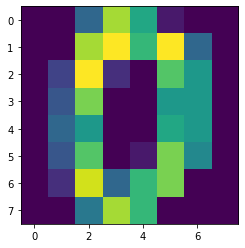

In [5]:
plt.imshow(digits_data.iloc[0].values.reshape(8,8))

Now visualizing multiple images

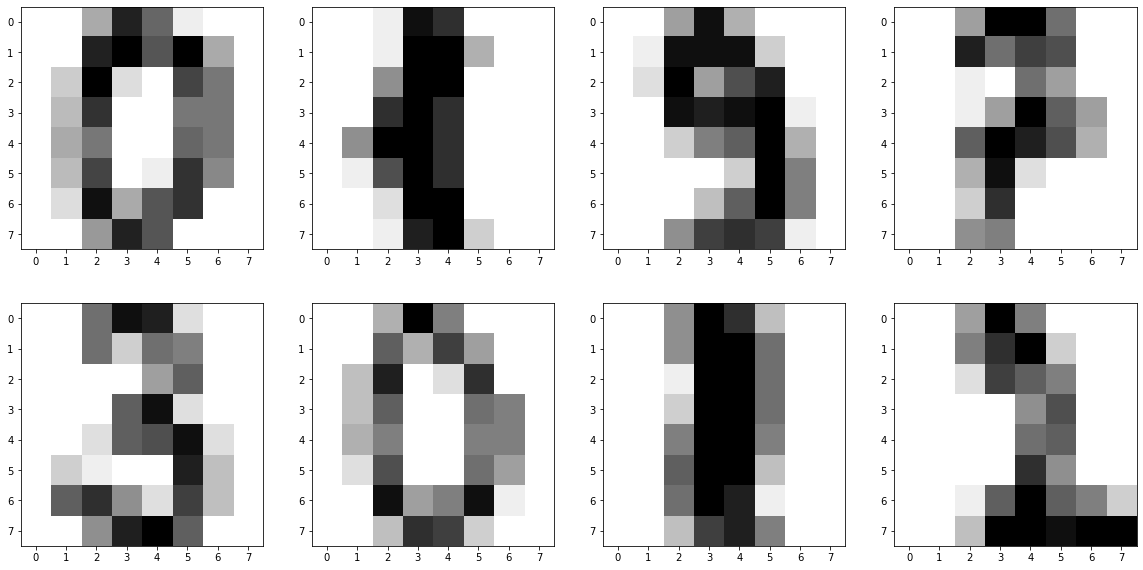

In [6]:
fig, axs = plt.subplots(2,4, figsize = (20,10))
axs[0,0].imshow(digits_data.iloc[0].values.reshape(8,8), cmap = 'gray_r')
axs[0,1].imshow(digits_data.iloc[99].values.reshape(8,8), cmap = 'gray_r')
axs[0,2].imshow(digits_data.iloc[199].values.reshape(8,8), cmap = 'gray_r')
axs[0,3].imshow(digits_data.iloc[299].values.reshape(8,8), cmap = 'gray_r')
axs[1,0].imshow(digits_data.iloc[999].values.reshape(8,8), cmap = 'gray_r')
axs[1,1].imshow(digits_data.iloc[1099].values.reshape(8,8), cmap = 'gray_r')
axs[1,2].imshow(digits_data.iloc[1199].values.reshape(8,8), cmap = 'gray_r')
axs[1,3].imshow(digits_data.iloc[1299].values.reshape(8,8), cmap = 'gray_r')

## Dividing Dataset Into Train and Test Sets:

* shuffle the DS
* reindex
* 80% are training
* 20% are test

In [7]:
features = digits_data
target = pd.Series(digits_raw.target)

In [8]:
np.random.seed(1)
new_ind = np.random.permutation(target.index)
features_shuff = features.copy().reindex(index = new_ind).reset_index().drop(columns = 'index')
target_shuff = target.copy().reindex(index = new_ind).reset_index().drop(columns = 'index')
cut_ind = int(len(target_shuff)*0.8)
train_feats = features_shuff.iloc[:cut_ind]
train_targs = target_shuff.iloc[:cut_ind]
test_feats = features_shuff.iloc[cut_ind:]
test_targs = target_shuff.iloc[cut_ind:]

## First Machine Learning Algorithm: K-Nearest Neighbors

Advantages:

* no presumptions about possible linearity between features and targets
* no actual training process

Disadvantages:

* typically very limited in accuracy
* Has to look through entire (part of dataset) for each value --> quickly becomes very expensive on large datasets

In [9]:
train_targs.values

array([[1],
       [5],
       [0],
       ...,
       [7],
       [6],
       [3]])

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_feats.values, np.ravel(train_targs.values,order = 'C'))
predictions_knn = knn.predict(test_feats)
accuracy_score(test_targs, predictions_knn)

0.9833333333333333

The algorithm is very good at chosing the right digit

Cross validation instead of simple 80/20 split of DF:

In [37]:
from sklearn.model_selection import KFold, cross_val_score
def train_and_test_knn(k):
    t0 = time.time()
    kf = KFold(4, shuffle = True, random_state = 2)
    model = KNeighborsClassifier(n_neighbors = k, n_jobs = 4)
    accs = cross_val_score(model, features, target, scoring = 'accuracy', cv = kf,
                           n_jobs = 4)
    print(time.time() - t0)
    return accs.mean()

In [12]:
train_and_test_knn(5)

0.9849777282850779

In [13]:
ks = []
accs = []
times = []

for k in range(1,15):
    t0 = time.time()
    ks.append(k)
    accs.append(train_and_test_knn(k))
    times.append(time.time() - t0)

In [14]:
results = pd.DataFrame([ks,accs,times])
results = results.transpose()
results.columns = ['k', 'accuracy', 'time']
results

,k,accuracy,time
0,1.0,0.988873,15.066867
1,2.0,0.982191,15.501124
2,3.0,0.987201,21.215528
3,4.0,0.983307,16.226260
4,5.0,0.984978,20.267690
5,6.0,0.982752,22.949440
6,7.0,0.984422,19.281380
7,8.0,0.980527,16.262415
8,9.0,0.982757,19.187542
9,10.0,0.978859,13.357472


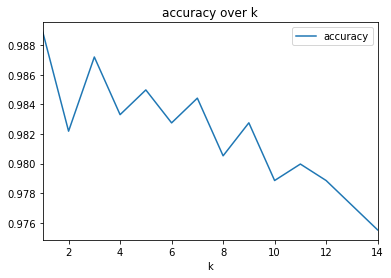

In [15]:
results.plot.line(x = 'k', y = 'accuracy')
plt.title('accuracy over k')
plt.show()

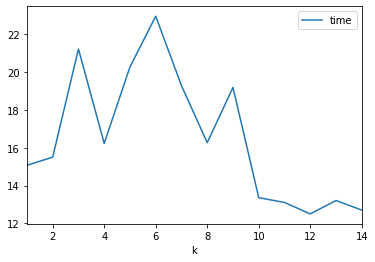

In [17]:
results.plot.line(x = 'k', y = 'time')

## Neural Network:

Neural network will be constructed for the same problem. Staring off with on ly one hidden layer with increasing ammounts of neurons

In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score
def train_and_test_nn(hl):
    kf = KFold(n_splits = 5, shuffle = True, random_state = 2)
    model = MLPClassifier(hidden_layer_sizes = hl, activation = 'tanh', shuffle = False)
    accs = cross_val_score(model, features, target, scoring = 'accuracy', cv = kf, n_jobs = -1)
    return accs.mean()

In [28]:
train_and_test_nn(8,)

0.8875750541627978

In [35]:
import time
ks = []
accs = []
times = []
for k in [3,4,5,6,7,8]:
    t0 = time.time()
    ks.append(2**k)
    accs.append(train_and_test_nn((2**k,)))
    ti = time.time() - t0
    times.append(ti)
    print(ti)    

30.932955741882324
29.71334934234619
35.34956455230713
44.755873680114746
51.01099228858948
56.165170192718506


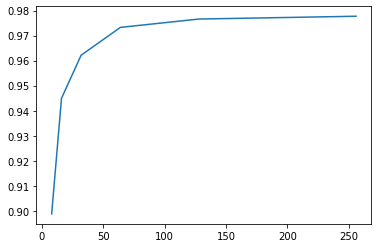

In [36]:
plt.plot(ks,accs)

At higher neuron counts the improvement in accuracy decreases. The problem, does become reasonably computationally expensive. The accuracy with 256 neurons is at around 98 %. Now neural network with two hidden layers:

In [39]:
print(train_and_test_nn((64,64)))

0.9710770659238624


A neural network with two hidden layers of 64 neurons performs comparably to the k-nearest-neighbors model

## Neural Network with Three Hidden Layers
Now looking at a model with three hidden layers. This can lead to overfitting, so the number of folds will be increased to 6.

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score
def train_and_test_nn(hl):
    t0 = time.time()
    kf = KFold(n_splits = 6, shuffle = True, random_state = 2)
    model = MLPClassifier(hidden_layer_sizes = hl, activation = 'tanh', shuffle = False)
    accs = cross_val_score(model, features, target, scoring = 'accuracy', cv = kf, n_jobs = -1)
    print(time.time() - t0)
    return accs.mean()

In [42]:
accs = []
ks = []
for k in [10,64,128]:
    accs.append(train_and_test_nn((k,k,k)))
    ks.append(k)

45.098517656326294
49.75937080383301
72.4008572101593


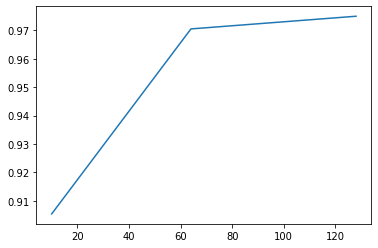

In [43]:
plt.plot(ks,accs)

With the larger amount of hidden layers, the accuracy of the model can be increased slightly.